In [19]:
import pandas as pd
import datetime
import quandl
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

quandl.ApiConfig.api_key = 'nFqpxXnQTs-ge9yK-STT'

### Collect for Google stock prices

In [10]:
goog = quandl.get("WIKI/GOOG")

In [17]:
goog.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0


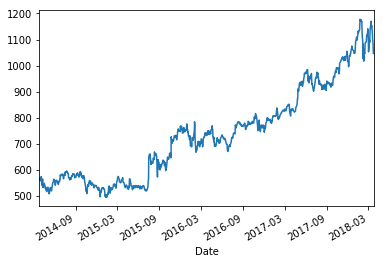

In [12]:
goog["Open"].plot()

In [25]:
goog.Open.max()

1177.33

### Frequency based aggregation

We will need to to frequency based aggregation. Resample method will do exactly that. It will aggregate results (min, max, mean, etc) for a particular period of time

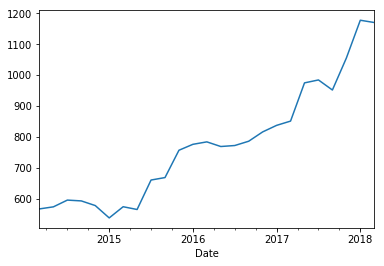

In [33]:
goog.resample("2M").max()["Open"].plot()

### Shift

Shift will be used to shift your timeseries up or down. This can be achieved using `.shift()` function. 

In [34]:
goog.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0


In [35]:
goog.shift(periods=1).head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-28,568.00,568.00,552.92,558.46,13100.0,0.0,1.0,568.00,568.00,552.92,558.46,13100.0
2014-03-31,561.20,566.43,558.67,559.99,41100.0,0.0,1.0,561.20,566.43,558.67,559.99,41100.0
2014-04-01,566.89,567.00,556.93,556.97,10800.0,0.0,1.0,566.89,567.00,556.93,556.97,10800.0
2014-04-02,558.71,568.45,558.71,567.16,7900.0,0.0,1.0,558.71,568.45,558.71,567.16,7900.0


Everything has been shifted down, and the last entry is lost. You can similarly shift everything up by using `periods=-1`